In [2]:
4096//4

1024

In [10]:
100 * 100

10000

In [20]:
0.0001 * 0.99**300

4.904089407128572e-06

In [7]:
s = ""
c = 0
for i in range(0, 183, 3):
    s += f" {i}"
    if i > 3:
        c+=1
print(s)
print(c)

 0 3 6 9 12 15 18 21 24 27 30 33 36 39 42 45 48 51 54 57 60 63 66 69 72 75 78 81 84 87 90 93 96 99 102 105 108 111 114 117 120 123 126 129 132 135 138 141 144 147 150 153 156 159 162 165 168 171 174 177 180
59


In [1]:
import h5py
import numpy as np
import pandas as pd
import polars as pl
import matplotlib.pyplot as plt
import ase
import jax.numpy as jnp

%load_ext autoreload
%autoreload 2

link = "/pchem-data/meuwly/boittier/eqmgnn/"
file1 = "data.hdf5?sequence=2"
file2 = "data_esp.hdf5?sequence=3"

In [10]:
f = h5py.File(link+file1, 'r')

In [11]:
f2 = h5py.File(link+file2, 'r')

In [12]:
f2_keys = list(f2.keys())

In [13]:
len(f2_keys)

13415

In [14]:
f2_keys[0]

'10009786300756252255_0'

In [15]:
test = f2[f2_keys[0]]

In [16]:
test_f1 = f[f2_keys[0]]

In [17]:
test_mono = np.array(test_f1["monopoles"]).reshape(-1)
test_mono.shape

(37,)

In [18]:
test_xyz = np.array(test_f1["coordinates"])
test_xyz.shape

(37, 3)

In [19]:
test_esp = np.array(test["esp"])
tets_vdw_surface = np.array(test["vdw_surface"])

In [20]:
tets_vdw_surface.shape

(4166, 3)

In [21]:
test_esp.shape

(4166,)

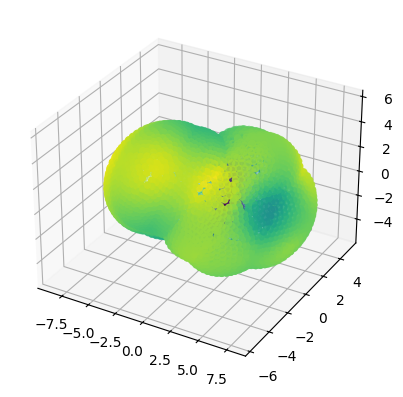

In [22]:
ax = plt.figure().add_subplot(projection='3d')

ax.scatter(*tets_vdw_surface.T, c=test_esp)


In [23]:
def calc_esp(charge_positions, charge_values, grid_positions):
    # Expand the grid positions and charge positions to compute all pairwise differences
    diff = grid_positions[:, None, :] - charge_positions[None, :, :]
    
    # Compute the Euclidean distance between each grid point and each charge
    r = jnp.linalg.norm(diff, axis=-1) * 1.88973

    # Calculate potential contribution from each charge at each grid point
    # and sum over charges
    V = jnp.sum(charge_values / r, axis=-1)
    return V

In [24]:
guess_v = calc_esp(test_xyz, test_mono, tets_vdw_surface)

CUDA backend failed to initialize: Found CUDA version 11070, but JAX was built against version 11080, which is newer. The copy of CUDA that is installed must be at least as new as the version against which JAX was built. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [25]:
guess_v.shape

(4166,)

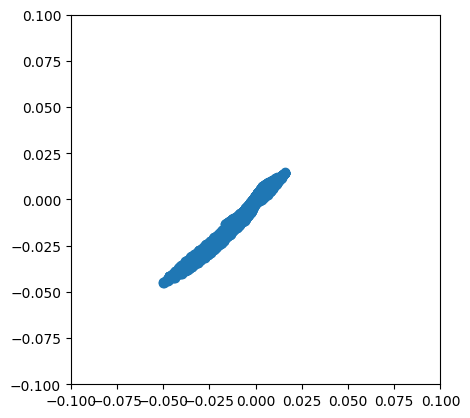

In [26]:
plt.scatter(test_esp, guess_v)
plt.xlim(-0.1,0.1)
plt.ylim(-0.1,0.1)
ax = plt.gca()
ax.set_aspect("equal")

In [27]:
pd.DataFrame(test_esp / guess_v ).describe()

,0
count,4166.000000
mean,2.076378
std,70.847710
min,-207.669861
25%,0.739939
50%,0.943918
75%,1.075717
max,4500.677734


# Data ESP

In [102]:
esp_data = []
data_block_esp = []

N = 13415

for k_i in range(N):
    k = f2_keys[k_i]
    data1 = f[k]
    data2 = f2[k]
    data_block_esp.append((data1, data2))



In [103]:
elements = [np.array(data_block_esp[i][0]["elements"]) for i in range(N)]
N_elements = [_.shape[0] for _ in elements]

In [104]:
coordinates = [np.array(data_block_esp[i][0]["coordinates"]) for i in range(N)]

total_energy = [np.array(data_block_esp[i][0]["total_energy"]) for i in range(N)]
gradient = [np.array(data_block_esp[i][0]["gradient"]) for i in range(N)]

monopoles = [np.array(data_block_esp[i][0]["monopoles"]) for i in range(N)]
dipoles = [np.array(data_block_esp[i][0]["dipoles"]) for i in range(N)]
quadrupoles = [np.array(data_block_esp[i][0]["quadrupoles"]) for i in range(N)]

keys = [f2_keys[k_i] for k_i in range(N) ]

In [105]:
esp = [np.array(data_block_esp[i][1]["esp"]) for i in range(N)]
vdw_surface = [np.array(data_block_esp[i][1]["vdw_surface"]) for i in range(N)]
N_grid = [_.shape[0] for _ in esp]

In [106]:
N_grid

[4166,
 4165,
 4184,
 4172,
 4178,
 4196,
 4165,
 4130,
 4130,
 4179,
 4158,
 4188,
 4197,
 4153,
 4191,
 4155,
 3693,
 3672,
 3676,
 3712,
 3707,
 3682,
 3686,
 3659,
 3833,
 3854,
 3971,
 3856,
 4007,
 3969,
 3970,
 3811,
 3765,
 3905,
 3906,
 3957,
 4706,
 4485,
 4660,
 4607,
 4695,
 4506,
 4606,
 4638,
 4606,
 4675,
 4545,
 4591,
 4693,
 4678,
 4714,
 4497,
 4487,
 4421,
 4514,
 4461,
 4494,
 4442,
 4446,
 4292,
 4458,
 4469,
 4479,
 4485,
 4444,
 4465,
 4317,
 4505,
 3813,
 3796,
 3856,
 3805,
 3796,
 3809,
 3796,
 3769,
 3794,
 3782,
 3800,
 3819,
 3806,
 3835,
 3798,
 3804,
 4152,
 4209,
 4157,
 4153,
 4183,
 4171,
 4168,
 4158,
 4200,
 4196,
 4168,
 4177,
 4148,
 4200,
 4153,
 4233,
 4217,
 4239,
 4203,
 3864,
 3875,
 3883,
 4354,
 4244,
 4276,
 4341,
 4360,
 4324,
 4245,
 4378,
 4313,
 4364,
 4377,
 4378,
 4368,
 3604,
 3524,
 3605,
 3548,
 3572,
 3582,
 3619,
 3605,
 3604,
 3604,
 4436,
 4520,
 4488,
 4522,
 4441,
 4492,
 4535,
 4413,
 4543,
 4441,
 4516,
 4500,
 4464,
 4567,

In [107]:
max_grid_points = max([_.shape for _ in esp])[0]
max_N_atoms = 60

In [108]:
max_grid_points

5346

In [109]:
Z = [np.array([ase.data.atomic_numbers[_.decode("utf-8").capitalize()] for _ in elements[i]]) for i in range(N)]

In [110]:
pad_coords = np.array([np.pad(coordinates[i], ((0,max_N_atoms - len(coordinates[i])),(0,0))) for i in range(N)])
pad_coords.shape

(13415, 60, 3)

In [111]:
pad_Z = np.array([np.pad(Z[i], ((0,max_N_atoms - len(Z[i])))) for i in range(N)])
pad_Z.shape

(13415, 60)

In [112]:
pad_mono = [np.pad(monopoles[i],((0,max_N_atoms - len(monopoles[i])),(0,0))) for i in range(N)]
print(len(pad_mono))
# pad_mono = np.array(pad_mono)
# pad_mono.shape

13415


In [113]:
pad_dipo = []
for i in range(N):
    try:
        _ = np.pad(dipoles[i],((0,max_N_atoms - len(dipoles[i])),(0,0))) 
        pad_dipo.append(_)
    except ValueError:
        print(i,dipoles[i])
        pad_dipo.append(jnp.zeros((60,3)))
    

9855 []
11621 []


In [114]:
pad_esp =  [np.pad(esp[i],((0,max_grid_points - len(esp[i])))) for i in range(N)]

In [115]:
pad_esp = np.array(pad_esp)
pad_esp.shape

(13415, 5346)

In [116]:
pad_vdw_surface = []
for i in range(N):
    try:
        _ = np.pad(vdw_surface[i],((0,max_grid_points - len(vdw_surface[i])),(0,0)), "constant", constant_values=(0, 10000)) 
        pad_vdw_surface.append(_)
    except ValueError:
        print(i,vdw_surface[i])
        pad_vdw_surface.append(10000*jnp.ones((max_grid_points,3)))

In [117]:
pad_vdw_surface = np.array(pad_vdw_surface)
pad_vdw_surface.shape

(13415, 5346, 3)

(array([  71.,  158.,  355., 1838., 3388., 3448., 2995.,  862.,  205.,
          95.]),
 array([10. , 14.3, 18.6, 22.9, 27.2, 31.5, 35.8, 40.1, 44.4, 48.7, 53. ]),
 <BarContainer object of 10 artists>)

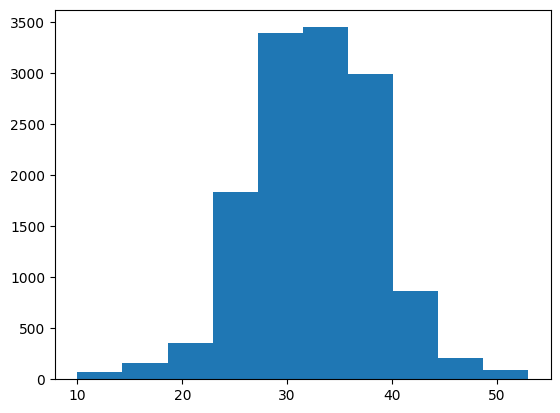

In [118]:
plt.hist(N_elements)

In [119]:
np.savez(f'esp{N}.npz', 
         R=pad_coords,
         Z=pad_Z, 
         N=N_elements, 
         mono=pad_mono, 
         esp=pad_esp,
        n_grid=np.array(N_grid),
         vdw_surface=pad_vdw_surface
        )

In [120]:
i = 471

In [121]:
guess_v = calc_esp(pad_coords[i], pad_mono[i].squeeze(), pad_vdw_surface[i])

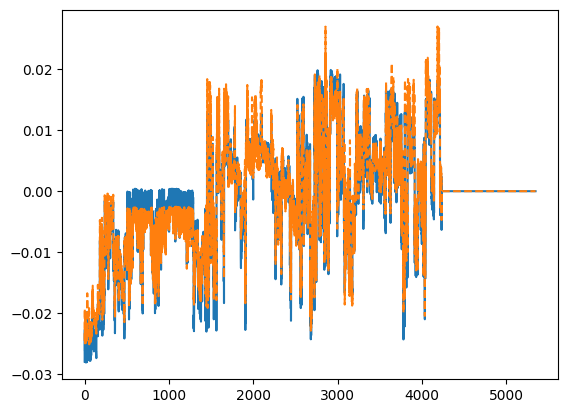

In [122]:
plt.plot(guess_v)
plt.plot(pad_esp[i], linestyle="--")

In [123]:
guess_v

Array([-2.7920827e-02, -2.3835145e-02, -2.2678800e-02, ...,
        3.5452103e-09,  3.5452103e-09,  3.5452103e-09], dtype=float32)

In [124]:
pad_esp[i].shape

(5346,)

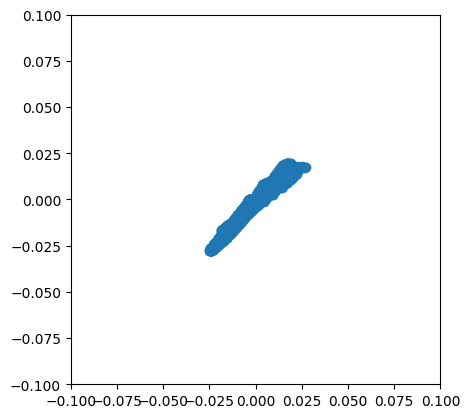

In [125]:
plt.scatter(pad_esp[i], guess_v)
plt.xlim(-0.1,0.1)
plt.ylim(-0.1,0.1)
ax = plt.gca()
ax.set_aspect("equal")

#  Data Mulitpoles

In [100]:
f = h5py.File(link+file1, 'r')

In [13]:
all_keys = list(f.keys())


In [15]:
f[f2_keys[0]].keys()

<KeysViewHDF5 ['conformation_id', 'coordinates', 'dipoles', 'elements', 'gradient', 'molecular_dipole', 'molecular_dipole_mbis', 'molecule_key', 'monopoles', 'octupoles', 'quadrupoles', 'relative_energy', 'set', 'smiles', 'total_energy']>

In [10]:
f

<HDF5 file "data.hdf5?sequence=2" (mode r)>

In [5]:
k = list(f.keys())[0]
k

'10000031047168203145_0'

In [25]:
len(all_keys)

766110

In [6]:
f[k].keys()

<KeysViewHDF5 ['conformation_id', 'coordinates', 'dipoles', 'elements', 'gradient', 'molecular_dipole', 'molecular_dipole_mbis', 'molecule_key', 'monopoles', 'octupoles', 'quadrupoles', 'relative_energy', 'set', 'smiles', 'total_energy']>

In [32]:
np.array(f[k]["molecule_key"])

array(b'10000031047168203145', dtype=object)

In [28]:
np.array(f.get("coordinates"))

array(None, dtype=object)

In [24]:
# np.array(f[all_keys]["dipoles"])

In [103]:
ase.data.atomic_numbers[b"C".decode("utf-8")]

6

array([6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [175]:
# N = len(f.keys())
N = 766000
N

766000

In [136]:
data_block = []
for k_i in range(N):
    k = all_keys[k_i]
    data = f[k]
    data_block.append(data)

In [227]:
elements = [np.array(data_block[i]["elements"]) for i in range(N)]
N_elements = [_.shape[0] for _ in elements]

In [137]:
coordinates = [np.array(data_block[i]["coordinates"]) for i in range(N)]

total_energy = [np.array(data_block[i]["total_energy"]) for i in range(N)]
gradient = [np.array(data_block[i]["gradient"]) for i in range(N)]

# # relative_energy = [np.array(data_block[i]["relative_energy"]) for i in range(N)]
# smiles = [np.array(data_block[i]["smiles"]) for i in range(N)]
# elements = [np.array(data_block[i]["elements"]) for i in range(N)]

monopoles = [np.array(data_block[i]["monopoles"]) for i in range(N)]
dipoles = [np.array(data_block[i]["dipoles"]) for i in range(N)]
quadrupoles = [np.array(data_block[i]["quadrupoles"]) for i in range(N)]

keys = [all_keys[k_i] for k_i in range(N) ]


In [165]:
keys = np.array(keys)
keys.shape

(766110,)

In [143]:
max(N_elements)

60

In [230]:
max_N_atoms = 60

In [231]:
Z = [np.array([ase.data.atomic_numbers[_.decode("utf-8").capitalize()] for _ in elements[i]]) for i in range(N)]

In [232]:
pad_coords = np.array([np.pad(coordinates[i], ((0,max_N_atoms - len(coordinates[i])),(0,0))) for i in range(N)])
pad_coords.shape

(766000, 60, 3)

In [233]:
pad_Z = np.array([np.pad(Z[i], ((0,max_N_atoms - len(Z[i])))) for i in range(N)])
pad_Z.shape

(766000, 60)

In [234]:
pad_mono = [np.pad(monopoles[i],((0,max_N_atoms - len(monopoles[i])),(0,0))) for i in range(N)]
print(len(pad_mono))
# pad_mono = np.array(pad_mono)
# pad_mono.shape

766000


In [235]:
pad_mono[0]

array([[-0.503279],
       [ 0.152155],
       [-0.518394],
       [-0.046476],
       [-0.280975],
       [-0.024383],
       [-0.296821],
       [-0.00994 ],
       [-0.315036],
       [-0.331621],
       [ 0.246229],
       [-0.280428],
       [-0.050351],
       [-0.288074],
       [-0.158728],
       [-0.30546 ],
       [-0.027145],
       [-0.313634],
       [ 0.14029 ],
       [ 0.129059],
       [ 0.142682],
       [ 0.135406],
       [ 0.129155],
       [ 0.159151],
       [ 0.092477],
       [ 0.114266],
       [ 0.127337],
       [ 0.093675],
       [ 0.119301],
       [ 0.124237],
       [ 0.092345],
       [ 0.132579],
       [ 0.127607],
       [ 0.123649],
       [ 0.12949 ],
       [ 0.095879],
       [ 0.079351],
       [ 0.121153],
       [ 0.117882],
       [ 0.101187],
       [ 0.088865],
       [ 0.111469],
       [ 0.117345],
       [ 0.081191],
       [ 0.099099],
       [ 0.112118],
       [ 0.114184],
       [ 0.      ],
       [ 0.      ],
       [ 0.      ],


In [236]:
monopoles[41362]

array([], shape=(0, 1), dtype=float64)

In [237]:
pad_mono[41362]

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [238]:
for i in range(len(pad_mono)):
    if pad_mono[i].shape[0] != 60:
        print(i, pad_mono[i].shape)

In [239]:
len(dipoles[i])

25

In [244]:
i=0
np.pad(dipoles[i],((0,max_N_atoms - len(dipoles[i])),(0,0))).shape

(60, 3)

In [241]:
jnp.zeros((61,3)).shape

(61, 3)

In [212]:
# pad_dipo = [np.pad(dipoles[i],((0,max_N_atoms - len(dipoles[i])),(0,0))) for i in range(N)]
# len(pad_dipo)

In [245]:
pad_dipo = []
for i in range(N):
    try:
        _ = np.pad(dipoles[i],((0,max_N_atoms - len(dipoles[i])),(0,0))) 
        pad_dipo.append(_)
    except ValueError:
        print(i,dipoles[i])
        pad_dipo.append(jnp.zeros((60,3)))
    

41362 []
42971 []
64718 []
106179 []
125083 []
139799 []
144617 []
151501 []
207084 []
208220 []
238738 []
240632 []
264139 []
265822 []
288509 []
297853 []
349267 []
358444 []
370102 []
375812 []
382019 []
407522 []
412397 []
462093 []
515078 []
515577 []
517193 []
519636 []
521858 []
569049 []
579133 []
580936 []
650199 []
651393 []
654407 []
657583 []
673831 []
675347 []
698802 []
735775 []
744644 []
755821 []
760931 []


In [246]:
pad_dipo = np.array(pad_dipo)

In [247]:
pad_dipo.shape

(766000, 60, 3)

In [248]:
i = 0
np.pad(quadrupoles[i],((0,max_N_atoms - len(quadrupoles[i])),(0,0))).shape

(60, 6)

In [249]:
pad_quad = []
for i in range(N):
    try:
        _ = np.pad(quadrupoles[i],((0,max_N_atoms - len(quadrupoles[i])),(0,0))) 
        pad_quad.append(_)
    except ValueError:
        print(i,quadrupoles[i])
        pad_quad.append(jnp.zeros((60,6)))

41362 []
42971 []
64718 []
106179 []
125083 []
139799 []
144617 []
151501 []
207084 []
208220 []
238738 []
240632 []
264139 []
265822 []
288509 []
297853 []
349267 []
358444 []
370102 []
375812 []
382019 []
407522 []
412397 []
462093 []
515078 []
515577 []
517193 []
519636 []
521858 []
569049 []
579133 []
580936 []
650199 []
651393 []
654407 []
657583 []
673831 []
675347 []
698802 []
735775 []
744644 []
755821 []
760931 []


In [250]:
pad_quad = np.array(pad_quad)
pad_quad.shape

(766000, 60, 6)

In [251]:
# pad_quad = np.array([np.pad(quadrupoles[i],((0,max_N_atoms - len(quadrupoles[i])),(0,0))) for i in range(N)])
# pad_quad.shape

In [252]:
pad_grad = np.array([np.pad(gradient[i],((0,max_N_atoms - len(gradient[i])),(0,0))) for i in range(N)])
pad_grad.shape

(766000, 60, 3)

In [253]:
np.savez(f'mulitpoles{N}.npz', 
         R=pad_coords,
         Z=pad_Z, 
         N=N_elements, 
         F=pad_grad, 
         mono=pad_mono, 
         dip=pad_dipo, 
         quad=pad_quad
        )